In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
#simple vector in python

[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's ndarray, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors

In [4]:
import numpy as np

video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([ 10.5 ,   5.2 ,   3.25,   7.  ])

video $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$
This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning
This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning

In [6]:
#obtain size of vector
video.size

4

In [8]:
video[2]  #3rd element

3.25

## Plotting Vectors

To plot vectors we will use matplotlib, so let's start by importing it (for details about matplotlib, check the matplotlib tutorial):

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
u = np.array([2, 5])
v = np.array([3, 1])

These vectors have 2 elements each, so they can be easily represented graphically on a 2d graph

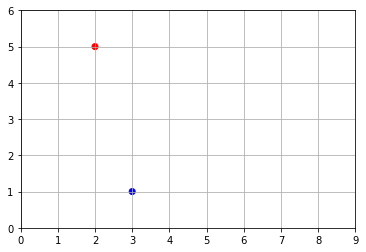

In [11]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r", "b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Vectors can also be represented as arrows

In [18]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

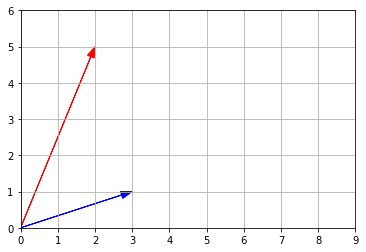

In [19]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Plot 3d vectors

In [20]:
a = np.array([1, 2, 6])
b = np.array([5, 6, 3])

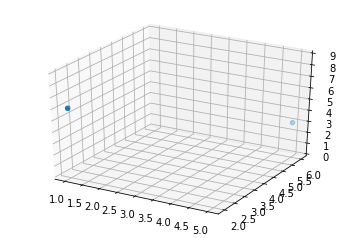

In [22]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Add vertical lines to better visualize

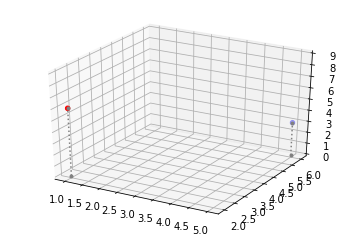

In [23]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

# Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [24]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.3851648071345037

Diagram to confirm length of vector

In [25]:
#use numpys norm function, available in the linalg module:

import numpy.linalg as LA
LA.norm(u)

5.3851648071345037

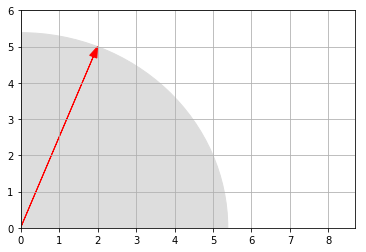

In [32]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

Vectors of the same size can be added together

In [38]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Graphically render vector addition

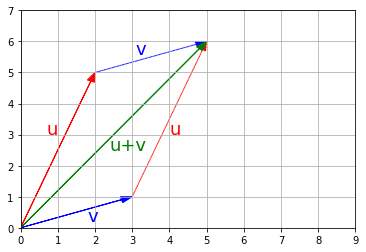

In [39]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is commutative, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. You can see it on the previous image: following $\textbf{u}$ then $\textbf{v}$ leads to the same point as following $\textbf{v}$ then $\textbf{u}$.
Vector addition is also associative, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.
If you have a shape defined by a number of points (vectors), and you add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$. This is called a geometric translation:

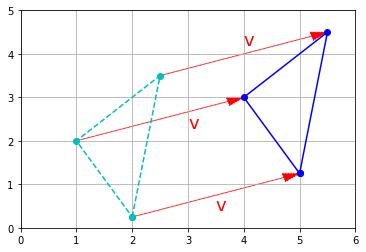

In [40]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

Finally, substracting a vector is like adding the opposite vector.

## Multiplication by a scalar

Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number

In [42]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([ 3. ,  7.5])

Graphically, scalar multiplication results in changing the scale of a figure, hence the name scalar. The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar. For example, let's scale up by a factor of k = 2.5:

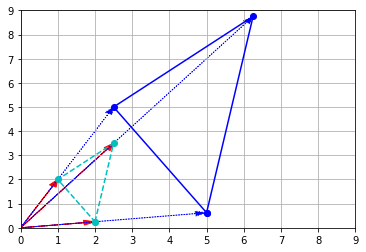

In [43]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

As you might guess, dividing a vector by a scalar is equivalent to multiplying by its inverse:

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is commutative: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also associative: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$

Finally, it is distributive over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

##Zero, unit and normalized vectors

A zero-vector is a vector full of 0s.
A unit vector is a vector with a norm equal to 1.
The normalized vector of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

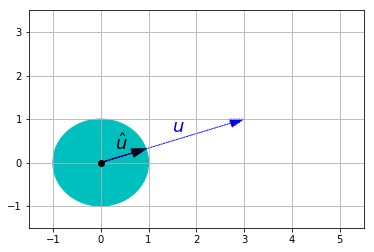

In [44]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Dot product

### Definition

The dot product (also called scalar product or inner product in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

In python, the dot product is pretty simple to implement:

In [45]:
def dot_product(v1, v2):
    return sum(vli *v2i for vli, v2i in zip(v1, v2))

dot_product(u, v)

11

More efficient in numpy with dot function

In [46]:
u.dot(v)

11

###  the * operator will perform an elementwise multiplication, NOT a dot product:

In [47]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])